# Capstone Project: Sentiment Analysis on Airbnb Reviews and Price Prediction

## Executive Summary

### Problem Statement

Airbnb is an online marketplace which allows people to rent out their properties or rooms to guests. Since Airbnb launched over 10 years ago, it has disrupted the travel and hospitality industry, with increasing trend of bookings for travellers' stay over the years, in preference to conventional hotels. The platform has thus become an income generation tool for house owners.

Some challenges that Airbnb hosts face include understanding the determinants for customer satisfaction and determining the optimal nightly price to list on the website. Although Airbnb does provide some general guidance, there are currently no free services which help hosts to determine the best price to rent out their space. One method could be to find a few listings that are similar to their place, and set the listing price based on the calculated average price. This method could be tedious given that the market is dynamic and hosts could also miss out on the competitive advantages that their listings has over similar listings such as how near it is to the MRT station, and other extra amenity facilities.  

Through this project, I intend to bridge these gaps by identifying the factors that contribute to a good review score rating and high room price to provide insights to hosts on the Airbnb Singapore platform to improve their earnings. Specifically, sentiment analysis and topic modelling using Natural Languange Processing techniques on the traveller reviews will be conducted to gain information from customer feedback, and a price prediction model using supervised machine learning regression algorithms will be developed to help home owners to set a price based on the listing characteristics. 
The performance of the regression models will be assessed using R^2 and Root Mean Square Error (RMSE) metrics.

### Data Set
The Airbnb reviews and listing datasets were sourced from the 'Inside Airbnb" website (http://insideairbnb.com/get-the-data.html), an investigatory/watchdog website which scrapes and reports scraped data on Airbnb website for multiple cities around the world, focusing on highlighting illegal renting on the site. 

The Airbnb Singapore dataset was scraped on 22 June 2020 and contains information on all Singapore listings that were live on the site on that date. A GeoJSON file of Singapore neighbourhoods was also downloaded from the same site.

The dataset comprises of two main tables:

- `Reviews`: Detailed reviews given by the guests with 6 attributes (columns).
- `Listings`: Detailed listings data showing 106 attributes for each of the listings. The data dictionary is shown below after dropping a bunch of columns that are not relevant for the problem. 

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|listing_id            |int      |reviews |listing id
|id           |int      |reviews |review id
|date      |datetime |reviews| date of review
|reviewer_id         |int      |reviews| reviewer id
|reviewer_name       |str      |reviews| reviewer name
|comments        |str      |reviews| review comments left by the guests
|id            |int      |detailed_listings |listing id
|summary           |str      |detailed_listings |summary of listing characteristics
|description      |str |detailed_listings| detailed description of listing characteristics
|transit         |str      |detailed_listings| description of transport accessibility
|host_id        |int      |detailed_listings| host id
|host_since        |datetime      |detailed_listings| date that the host first joined Airbnb
|host_response_time          |str    |detailed_listings| average amount of time the host takes to reply to guest inquiries and booking requests
|host_response_rate          |str    |detailed_listings|  proportion of guest inquiries and booking requests that the host replies to
|host_acceptance_rate|str|detailed_listings| proportion of guest reservations that the host accepts
|host_is_superhost           |str|detailed_listings| whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts who provide extraordinary experiences for their guests.
|host_identity_verified            |str|detailed_listings| whether or not the host has been verified with their identity
|neighbourhood_cleansed      |str|detailed_listings| the Singapore neighbourhood town the property is located
|neighbourhood_group_cleansed        |str      |detailed_listings| the broad neighbourhood region the property is located
|latitude           |float      |detailed_listings| latitude coordinate
|longitude |float |detailed_listings| location longitude coordinate
|property_type         |str      |detailed_listings| type of property, e.g. apartment or hotel
|room_type|str|detailed_listings| type of room, e.g. private or shared room
|accommodates        |int|detailed_listings| number of people the property can accommodate
|bathrooms  |int|detailed_listings| number of bathrooms
|bedrooms     |int|detailed_listings| number of bedrooms
|beds     |int|detailed_listings| number of beds
|bed_type     |str|detailed_listings| type of bed, e.g. real bed or futon
|price  |str|detailed_listings| nightly advertised price (target variable)
|security_deposit     |str|detailed_listings| amount of security deposit required
|cleaning_fee    |str|detailed_listings| amount of cleaning fee (fixed amount paid per booking)
|guests_included  |int|detailed_listings| number of guests included in the booking fee
|extra_people     |str|detailed_listings| price per additional guest above the guests_included price
|minimum_nights  |int|detailed_listings| minimum length of stay
|maximum_nights     |int|detailed_listings| maximum length of stay
|has_availability     |str|detailed_listings| whether there is availability
|availability_30     |int|detailed_listings| number of nights available to be booked in the next 30 days 
|availability_60     |int|detailed_listings| number of nights available to be booked in the next 60 days 
|availability_90  |int|detailed_listings| number of nights available to be booked in the next 90 days 
|availability_365     |int|detailed_listings| number of nights available to be booked in the next 360 days 
|number_of_reviews     |int|detailed_listings| number of reviews left by guests
|number_of_reviews_ltm     |int|detailed_listings| number of reviews left by guests in the last 12 months
|first_review    |datetime|detailed_listings| date of first review
|last_review  |datetime|detailed_listings| date of last review
|review_scores_rating     |float|detailed_listings| average overall review rating scores 
|review_scores_accuracy    |float|detailed_listings| average rating scores for listing description accuracy 
|review_scores_cleanliness     |float|detailed_listings| average rating scores for property cleanliness  
|review_scores_checkin     |float|detailed_listings| average rating scores for guests' check-in process  
|review_scores_communication    |float|detailed_listings| average rating scores for host's communication 
|review_scores_location  |float|detailed_listings| average rating scores for listing location 
|review_scores_value    |float|detailed_listings| average rating scores for value-for-money consideration
|instant_bookable     |str|detailed_listings| whether or not the property can be instant booked, without having to message the host first and wait to be accepted
|is_business_travel_ready    |str|detailed_listings| whether or not the property has facilities to cater to business travellers e.g. Wi-fi, designated workspace, iron
|cancellation_policy  |str|detailed_listings| type of cancellation policy, e.g. strict or flexible
|calculated_host_listings_count     |int|detailed_listings| number of listings the host has on Airbnb
|reviews_per_month    |float|detailed_listings| average number of reviews left by guests each month

### Findings

A majority (about 97%) of the guests had positive reviews on the Airbnb experience based on the sentiment analysis scores.

The topics extracted from the Latent Dirichlet Allocation (LDA) algorithm provided an insight into the topics of discussion in the reviews of Airbnb guests. It is observed that topics can be broadly classified into the categories of (i) overall experience of stay, (ii) the amenities provided by the accommodation, (iii) noise level within the property/ neighbourhood, (iv) location of the unit and proximity to points of interest and (v) communication and friendliness of the hosts.

Hence, Airbnb hosts and potential home owners who plan to use the Airbnb platform to rent out their homes could utilise the insight from this analysis to better target their listings to potential customers or to strategise how to best serve their customers by providing better service quality e.g. personable interaction, homely feeling etc, which are important to guest satisfaction so as to boost the host's online reputation and get ahead of competitors. 

For the price prediction model, seven machine learning regression algorithms were evaluated in their predictive performance on Airbnb listing price in Singapore. The XGBoost regression model had the best predictive performance and was able to explain 81% of the variation in listing prices, with a RMSE of \\$41.38 on the test data, with negligible drop in model performance using a reduced set of 26 features for the production model.

Based on the exploratory analysis, the listing prices are generally higher for renting out serviced apartment/ hotel rooms or entire homes which can accommodate more guests. Likewise, accommodations with amenities such as TV, gym, pool and hot tub, and located close to the city at the central area also tend to fetch a higher listing price.   

Potential directions for future work to further improve the prediction model include the following:

- Use more accurate price data based on actual price paid by the guests. Such data is available for a fee in some websites such as AirDNA (https://www.airdna.co/).
- Incorporate the listing photos' image quality as a feature to the prediction model, using convolutional neural network techniques.
- Include other proximity features such as accessibility to restaurants and supermarkets in the listing neighbourhood.
- Add in more granular features specific to the accommodation unit such as the unit level and and whether there are good views from the unit.

### Contents:
- [Data Cleaning (Reviews)](#Data-Cleaning-(Reviews))
- [Sentiment Analysis](#Sentiment-Analysis)
- [Topic Modelling](#Topic-Modelling)<br>
    - [Positive Reviews](#Positive-Reviews)<br>
    - [Negative Reviews](#Negative-Reviews)
- [Summary](#Summary)

## Data Cleaning (Reviews)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import regex as re
from PIL import Image
from langdetect import detect
import string
import re
import warnings

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import names

warnings.filterwarnings('ignore')
sns.set_style('ticks')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.option_context('display.max_colwidth', 500);

### Import data

In [3]:
reviews = pd.read_csv('../data/reviews.csv')

In [106]:
reviews.shape

(91250, 6)

In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."


In [18]:
len(reviews['listing_id'].unique())

4488

In [5]:
# create a list of tuples to contain dataframe and name
dfs = [
    (reviews , 'reviews')
    ]


# print some basic information for each dataframe 
# number of rows and columns
# datatype and number of null values for each column in the dataframe

def basic_eda(df, name):
    print(f"""-----------------------------------------------\n
{name} dataframe \n
Rows: {df.shape[0]}             Columns: {df.shape[1]}
Duplicated rows: {(df.duplicated(keep=False) == True).sum()}
Columns:
{pd.concat([pd.DataFrame(data=df.dtypes, columns=['data_type']),
         pd.DataFrame(data=df.isnull().sum(), columns=['num_nulls'])], axis=1)}
    \n""")
print("DATAFRAMES INFORMATION")    

# call function    
[basic_eda(df, name) for (df,name) in dfs];

DATAFRAMES INFORMATION
-----------------------------------------------

reviews dataframe 

Rows: 91250             Columns: 6
Duplicated rows: 0
Columns:
              data_type  num_nulls
listing_id        int64          0
id                int64          0
date             object          0
reviewer_id       int64          0
reviewer_name    object          0
comments         object        115
    



### Drop missing comments

In [8]:
# drop rows with missing comments
reviews.dropna(subset=['comments'], inplace=True)
reviews = reviews.reset_index()
del reviews['index']

In [108]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91135 entries, 0 to 91134
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     91135 non-null  int64 
 1   id             91135 non-null  int64 
 2   date           91135 non-null  object
 3   reviewer_id    91135 non-null  int64 
 4   reviewer_name  91135 non-null  object
 5   comments       91135 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.2+ MB


### Remove hyperlinks

In [46]:
reviews[reviews['comments'].str.contains('\.com|\.org')]

,listing_id,id,date,reviewer_id,reviewer_name,comments
5449,2858696,22778639,2014-11-14,23401807,Yohannes,This is the first time i used airbnb.com and i...
25226,8779986,131328966,2017-02-11,93461502,Chloe,"Convenient location, accessible from the mrt....."
51886,17881784,499076136,2019-07-31,121968600,Juhardy,Very neat place...comfy n cozy...
64781,22071808,265684072,2018-05-18,168857699,Felice,"love to stay in Asher place, he is so nice, he..."
67187,23169041,324419168,2018-09-17,77279615,Yuyu,The location is perfect to go quickly anywhere...
74324,26915644,440533935,2019-04-21,54025362,Kikie,I booked Sumoy's place about a month before I ...


In [60]:
reviews['comments'][74324]

"I booked Sumoy's place about a month before I arrived. Unlike other hosts that had me before, Sumoy never communicated anything prior to me coming. So I had to texted her via (Hidden by Airbnb) as my message was never replied on airbnb. The day before I came and after I texted her, she told me she moved me to another apartment: https://www.airbnb.com/rooms/30938633?s=51. Although it was worrying, I went ahead because she assured me that the apartment can accommodate my group. \n\nIt did, the Mackenzie apartment was actually really nice. I like staying there and I would even consider myself to stay there again. However, I would suggest to all guests that are going to stay at Sumoy's or Paryani's to be careful of her arrangement. I read one of the comments that she moved guests to her other properties, never thought she'd do that to us. And she did.\n\nUpon a day after our arrival, she mentioned that she'll move us to another place and she made the mistake of forgetting that someone has

In [9]:
def remove_hyperlink(phrase):
    # phrase = re.sub("[^a-zA-Z]", " ", str(phrase))  # Replace all non-letters with spaces
    phrase = re.sub(r"((http|https):\/\/)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)", "", phrase)
    
    return phrase

In [10]:
# remove hyperlinks from reviews
reviews['comments'] = reviews['comments'].map(remove_hyperlink)

### Drop automated postings

In [11]:
# Automated postings on reservation cancellation before guests arrival
reviews[reviews['comments'].str.contains('This is an automated posting.')].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
25,56334,3544091,2013-02-14,2873375,Allen&Lisa,The reservation was canceled 38 days before ar...
50,71609,368048609,2019-01-06,96913513,Yasukawa,The host canceled this reservation 123 days be...
117,71903,473534476,2019-06-21,53439013,희경,The host canceled this reservation 7 days befo...
153,71907,368052797,2019-01-06,96913513,Yasukawa,The host canceled this reservation 123 days be...
188,241503,4387613,2013-05-01,5217157,Sonal,The reservation was canceled 11 days before ar...


In [111]:
reviews[reviews['comments'].str.contains('This is an automated posting.')].count()

listing_id       1159
id               1159
date             1159
reviewer_id      1159
reviewer_name    1159
comments         1159
dtype: int64

In [113]:
# Remove rows with automated postings
reviews = reviews[~reviews.comments.str.contains('This is an automated posting.')].reset_index()
del reviews['index']

In [114]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89976 entries, 0 to 89975
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     89976 non-null  int64 
 1   id             89976 non-null  int64 
 2   date           89976 non-null  object
 3   reviewer_id    89976 non-null  int64 
 4   reviewer_name  89976 non-null  object
 5   comments       89976 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.1+ MB


### Remove non-English reviews

In [117]:
# Create function to detect languages of the reviews
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [118]:
reviews['language'] = reviews['comments'].apply(language_detection)

In [119]:
# write to csv to avoid long runtime 
reviews.to_csv('../data/reviews_v2.csv', index=False)

In [120]:
reviews = pd.read_csv('../data/reviews_v2.csv')

In [121]:
reviews.language.value_counts().head(20)

en       74426
zh-cn     5709
ko        3581
fr        1104
de         854
ja         569
so         494
ro         458
es         377
ru         264
af         259
id         204
it         151
zh-tw      142
nl         141
ca         134
pl         103
cs          94
tl          81
no          79
Name: language, dtype: int64

In [14]:
reviews.language.unique()

array(['en', 'de', 'ko', 'lv', 'zh-cn', 'ja', 'af', 'pl', 'fr', 'es',
       'no', 'vi', 'ru', 'so', 'ro', 'nl', 'tl', 'zh-tw', 'da', 'it',
       None, 'fi', 'cs', 'ca', 'cy', 'hu', 'hr', 'id', 'sv', 'tr', 'pt',
       'he', 'th', 'lt', 'sw', 'et', 'sq', 'uk', 'sl', 'sk', 'bg', 'el',
       'mk', 'ar'], dtype=object)

In [123]:
# filter reviews with english language only
reviews = reviews[reviews.language == 'en'].reset_index()
del reviews['index']

In [124]:
# check unique listings with reviews 
len(reviews['listing_id'].unique())

4158

In [41]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...,en
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...,en
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...,en
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...,en
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am...",en


### Replace short words

In [125]:
# Create function to decontract short form words cos it may affect accuracy of sentiment analysis
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "cannot", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [126]:
# replace short words
reviews['comments'] = reviews['comments'].map(decontracted)

## Sentiment Analysis 

Sentiment analysis is a process by which textual information is analysed through the use of NLP to detect polarity (e.g. positive or negative opinion) within the text. 

I will be using VADER (Valence Aware Dictionary and sEntiment Reasoner), which is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is sensitive to both polarity (positive/ negative) and intensity (strength) of emotion. One key strength of the tool is that it is able to account for the differences in magnitude of the sentiment intensity by taking into consideration the emojis/ emoticons, punctuations (e.g. "!") and capitalizations (e.g. "good" vs "GOOD") used in the text which are commonly found in social media and product reviews.

The tool generates 3 sentiment scores (Positive, Negative and Neutral) based on the polarity scoring method. The respective sentiment scores represent the proportion of the text that falls into those categories. The compound score is computed by normalising the positive, negative and neutral scores and standardized to range between -1 (overall negative) and 1 (overall positive). 

### Feature Engineering: `Text Length`

A new column for the length of comments is created to explore whether there is a relationship between the text length and positive/ negative reviews.

In [127]:
# create new feature for text length
reviews['text_length'] = [len(x) for x in reviews['comments'].str.split(' ')]

In [128]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,text_length
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...,en,22
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...,en,40
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...,en,71
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...,en,42
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am...",en,17


### Compute sentiment scores

In [129]:
# Instantiate sentiment analyser tool
analyzer = SentimentIntensityAnalyzer()

In [130]:
# Create functions to compute the sentiment scores
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [131]:
# Compute and map the scores for the individual reviews to dataframe
%%time

reviews['sentiment_neg'] = reviews['comments'].map(negative_score)
reviews['sentiment_neu'] = reviews['comments'].map(neutral_score)
reviews['sentiment_pos'] = reviews['comments'].map(positive_score)
reviews['sentiment_compound'] = reviews['comments'].map(compound_score)

Wall time: 2min 40s


In [132]:
# write to csv to avoid long runtime 
reviews.to_csv('../data/reviews_v2.csv', index=False)

In [45]:
reviews = pd.read_csv('../data/reviews_v2.csv')

In [4]:
# Summarise distribution statistics
reviews.describe()

,listing_id,id,reviewer_id,text_length,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
count,7.442600e+04,7.442600e+04,7.442600e+04,74426.000000,74426.000000,74426.000000,74426.000000,74426.000000
mean,1.679174e+07,3.355089e+08,9.615774e+07,44.097775,0.015283,0.654712,0.330004,0.755584
std,1.039092e+07,1.845324e+08,8.443329e+07,47.465047,0.040320,0.173219,0.181427,0.305374
min,4.909100e+04,2.514670e+05,2.770000e+02,1.000000,0.000000,0.000000,0.000000,-0.993400
25%,8.055914e+06,1.750803e+08,2.726019e+07,14.000000,0.000000,0.561000,0.205000,0.680800
50%,1.629103e+07,3.339492e+08,6.854907e+07,30.000000,0.000000,0.683000,0.303000,0.872000
75%,2.372363e+07,5.067559e+08,1.476380e+08,58.000000,0.000000,0.773000,0.431000,0.948200
max,4.379245e+07,6.313891e+08,3.502777e+08,1005.000000,1.000000,1.000000,1.000000,0.999300


Text(0, 0.5, 'Number of reviews')

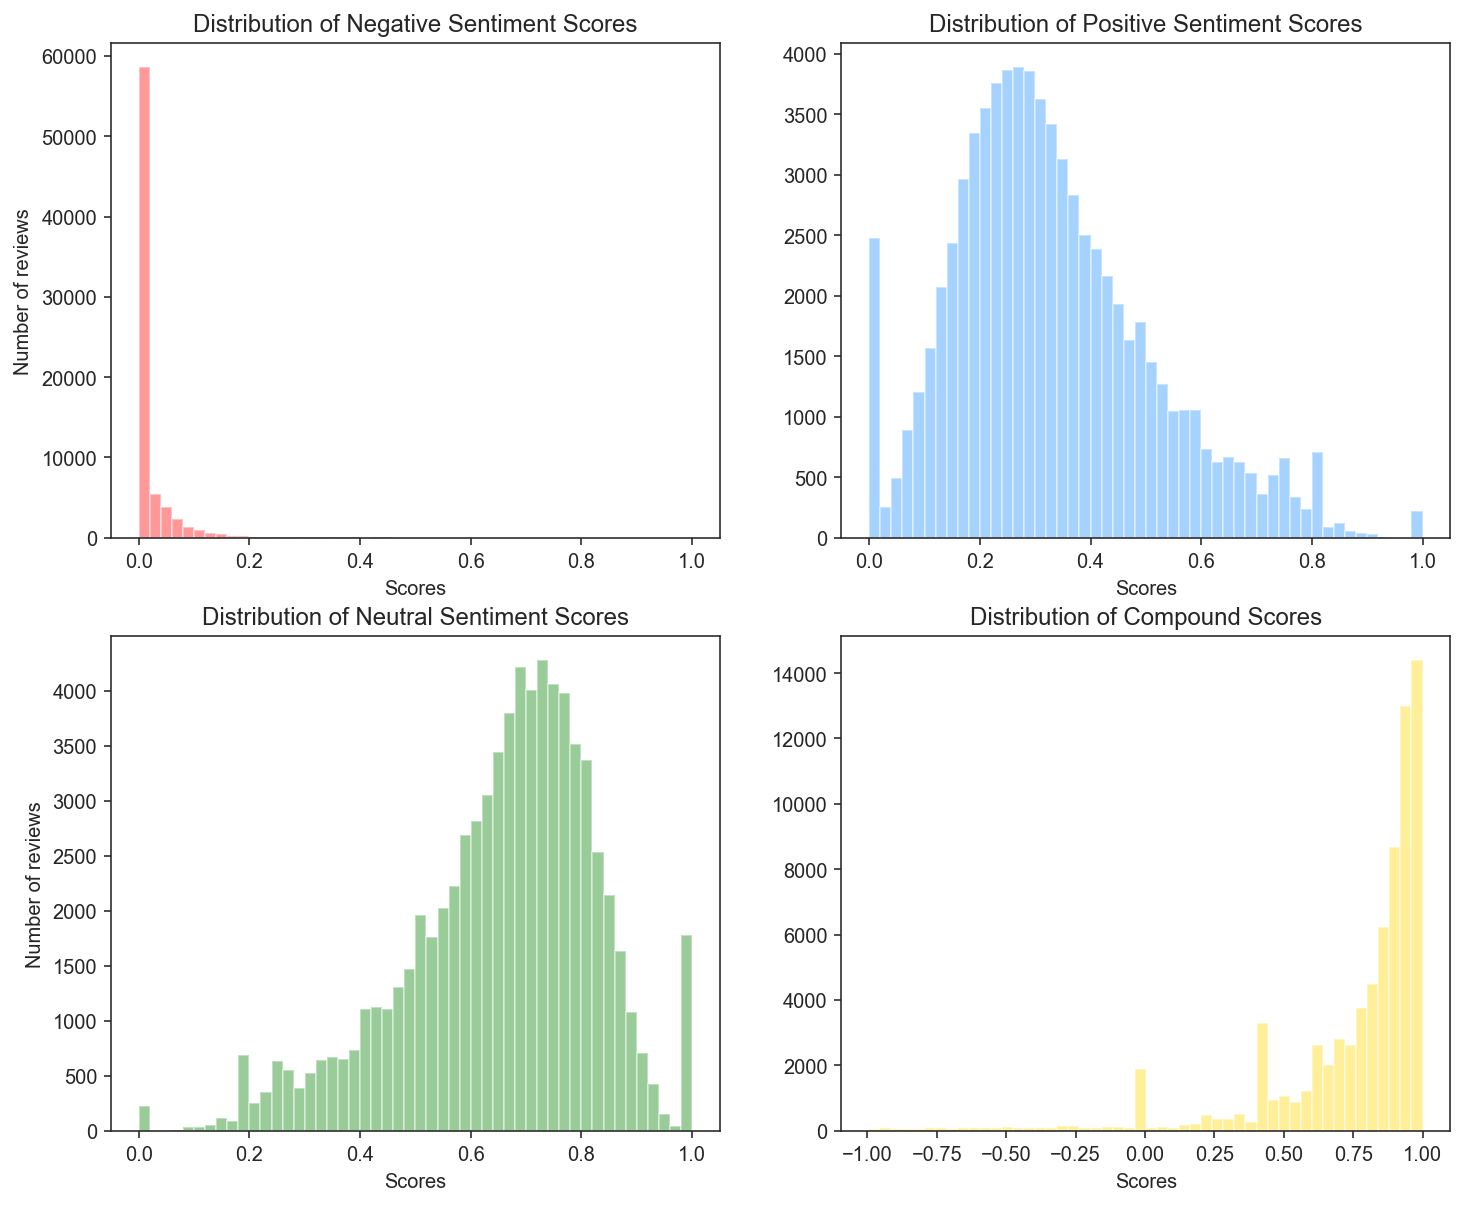

In [12]:
# Plot histograms of sentiment scores
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))

sns.distplot(reviews['sentiment_neg'], hist = True, ax=ax[0][0], kde = False,color='r')
ax[0][0].set_title('Distribution of Negative Sentiment Scores', fontsize=12)
ax[0][0].set_xlabel('Scores', size=10)

sns.distplot(reviews['sentiment_pos'], hist = True, ax=ax[0][1], kde = False,color='dodgerblue')
ax[0][1].set_title('Distribution of Positive Sentiment Scores', fontsize=12)
ax[0][1].set_xlabel('Scores', size=10)
             
sns.distplot(reviews['sentiment_neu'], hist = True, ax=ax[1][0], kde = False,color='g')
ax[1][0].set_title('Distribution of Neutral Sentiment Scores', fontsize=12)
ax[1][0].set_xlabel('Scores', size=10)

sns.distplot(reviews['sentiment_compound'], hist = True, ax=ax[1][1], kde = False,color='gold')                
ax[1][1].set_title('Distribution of Compound Scores', fontsize=12)
ax[1][1].set_xlabel('Scores', size=10)
             
ax[0][0].set_ylabel('Number of reviews')
ax[1][0].set_ylabel('Number of reviews')

In [5]:
# Number of negative reviews
len(reviews[reviews['sentiment_compound']<0])

2037

From the distribution plots for the sentiment scores, we can observe that majority of the reviews are positive, evident by the negatively skewed histogram plot for the compound score (high mean of 0.75), as a result of the low negative sentiment scores (shown by the red histogram) for the reviews. There are only 2.7% (2037 out of 74416) negative reviews in the dataset, which suggests most of the Airbnb guests generally have a positive experience.   

In [13]:
# Check example of negative reviews
reviews[reviews['sentiment_compound']<0].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,text_length,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
47,71609,524932232,2019-09-07,2898879,Jeni,The location is very close to EXPO and Bus sto...,en,25,0.062,0.938,0.000,-0.1531
76,71903,419387,2011-08-04,756759,Piotr,It was fine. Perfect for someone wanting to be...,en,38,0.096,0.806,0.098,-0.2382
79,71903,571168,2011-09-26,1108690,Birendra,It was unfortunate that Belinda was not arroun...,en,117,0.073,0.896,0.030,-0.5193
84,71903,3566850,2013-02-18,3628864,Andrey,The room is quite small but comfy. It has airc...,en,50,0.079,0.869,0.052,-0.3590
93,71903,99781332,2016-09-05,90012385,Shali,"It's terrible.The house near the airport ,but ...",en,45,0.113,0.887,0.000,-0.6520


In [14]:
reviews['comments'][93]

"It's terrible.The house near the airport ,but you can go there only by taxi.It is too old and untidy, We did not sleep well all night because it's too dirty,even have much hair on the bed.I think the owener did not do a good job."

In [8]:
# Create dataframe of average compound sentiment scores grouped by listing id 

sentiment_scores = reviews[['listing_id','sentiment_compound']].groupby(by='listing_id').mean()
sentiment_scores = sentiment_scores.reset_index()

In [9]:
sentiment_scores.head()

,listing_id,sentiment_compound
0,49091,0.961500
1,50646,0.920059
2,56334,0.946521
3,71609,0.693888
4,71896,0.854124


In [10]:
# Save to csv to include as a feature in listing price prediction
sentiment_scores.to_csv('../data/sentiment_scores.csv', index=False)

### Assign sentiment label to reviews

In [48]:
# Create new column to assign sentiment labels to reviews based on compound scores.
# Assign reviews with sentiment score of 0 to positive class as majority are generally positive from a check
for index, value in enumerate(reviews['sentiment_compound']):
    if value >= 0:
        reviews.loc[index,'sentiment'] = 'positive'
    else:
        reviews.loc[index,'sentiment'] = 'negative'

In [29]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,text_length,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,sentiment
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...,en,22,0.000,0.434,0.566,0.9615,positive
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...,en,40,0.000,0.644,0.356,0.9484,positive
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...,en,71,0.023,0.589,0.388,0.9868,positive
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...,en,42,0.000,0.625,0.375,0.9627,positive
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am...",en,17,0.000,0.447,0.553,0.9274,positive


### Text length of positive and negative reviews

In [35]:
# text length statistics grouped by sentiment
reviews['text_length'].groupby(reviews['sentiment']).describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
negative,2037.0,69.897398,84.517385,1.0,21.0,43.0,84.0,1005.0
positive,72389.0,43.371783,45.783837,1.0,14.0,30.0,57.0,802.0


Text(0.5, 0, 'Sentiment')

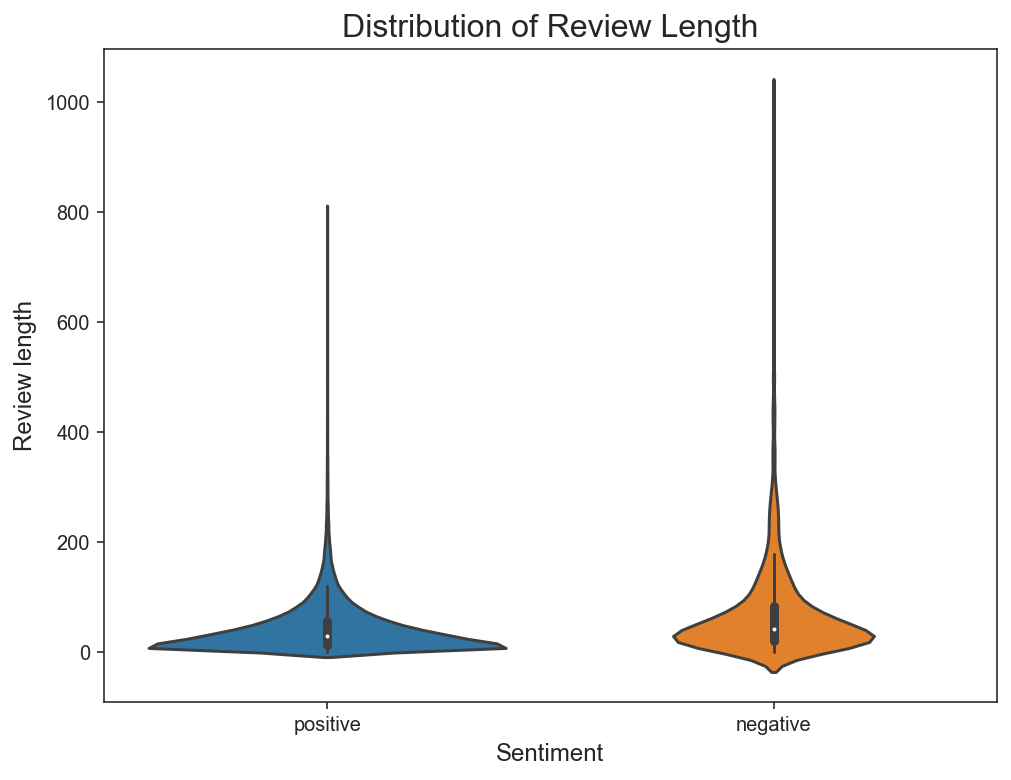

In [48]:
# Plot distribution of review length
plt.figure(figsize = (8,6))
sns.violinplot(x='sentiment', y='text_length', data=reviews)

# Plot formatting
plt.title('Distribution of Review Length', size=16)
plt.ylabel("Review length", size=12)
plt.xlabel("Sentiment", size=12)

From the violin plot above, the distributions of review lengths for both positive and negative reviews have a positive skew. The review length for negative reviews tend to be longer than positive reviews with a mean of 70 words compared to a mean of 43 words for positive reviews.   

### Word Cloud

In [16]:
# import image to np.array
upvote_mask = np.array(Image.open('../assets/upvote.png'))
downvote_mask = np.array(Image.open('../assets/downvote.png'))

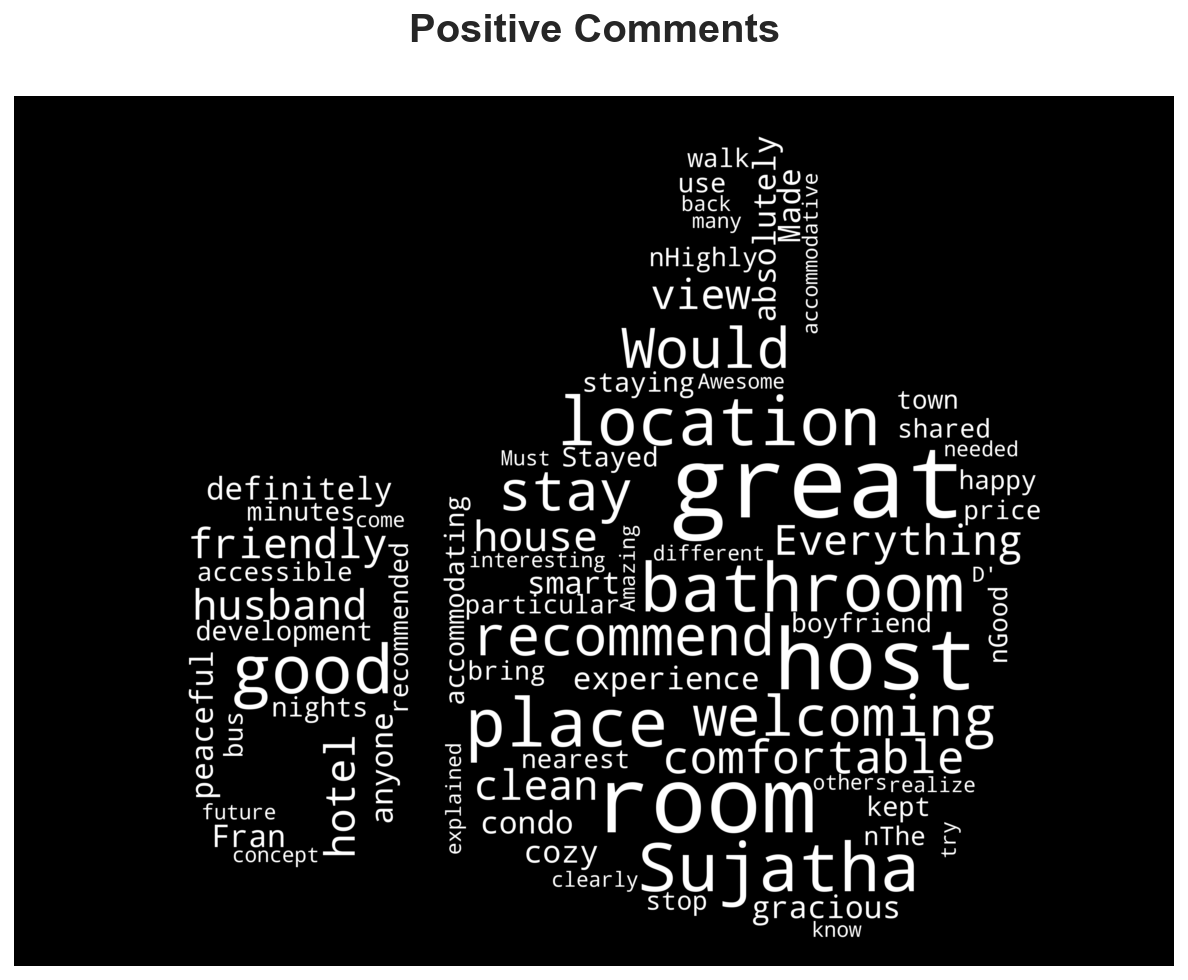

<Figure size 432x288 with 0 Axes>

In [55]:
# Plot word cloud for positive reviews
pos_wordcloud = WordCloud(max_font_size=350, max_words=200, background_color="black",
                      width= 3000, height = 2000, mask=upvote_mask,random_state=1,
                      color_func=lambda *args, **kwargs: "white", 
                      stopwords = stopwords.words('english')).generate(str(reviews[reviews['sentiment']=='positive']['comments'].values))

plt.figure(figsize = (12,8))

plt.imshow(pos_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive Comments\n', fontsize=20, fontweight='bold')
plt.show()

plt.tight_layout()

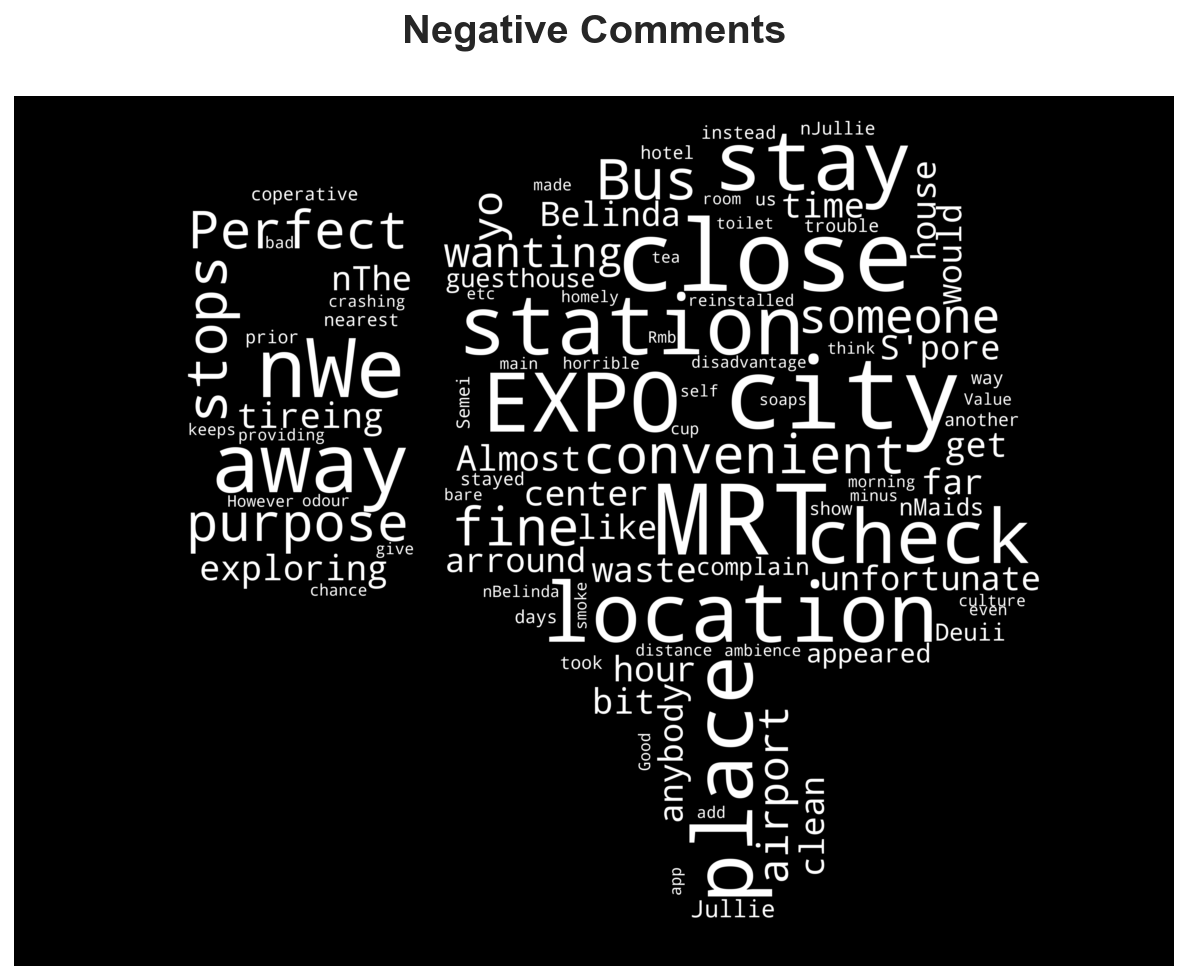

<Figure size 432x288 with 0 Axes>

In [56]:
# Plot word cloud for negative reviews
neg_wordcloud = WordCloud(max_font_size=350, max_words=200, background_color="black",
                      width= 3000, height = 2000,mask=downvote_mask,random_state=1,
                      color_func=lambda *args, **kwargs: "white",     
                      stopwords = stopwords.words('english')).generate(str(reviews[reviews['sentiment']=='negative']['comments'].values))

plt.figure(figsize = (12,8))

plt.imshow(neg_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative Comments\n', fontsize=20, fontweight='bold')
plt.show()

plt.tight_layout()

An analysis of the word cloud above shows some interesting findings. For the word cloud on positive reviews, host's personal service seems to be key in shaping the Airbnb experience, with the words "host", "accommodating, "friendly" and some host's names featuring quite prominently. There are also frequent mentions on location and accessibility. 

For the word cloud on negative reviews, words related to location and transport e.g. "location", "city", "MRT stations" and "bus stops" are featured quite prominently instead which suggest a significant number of negative experiences are related to the inaccessibility of the Airbnb listing. 

### Most common words

In [81]:
# instantiate a basic vectoriser with only settings for extracting uni-grams
cvec = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, ngram_range=(1,1))

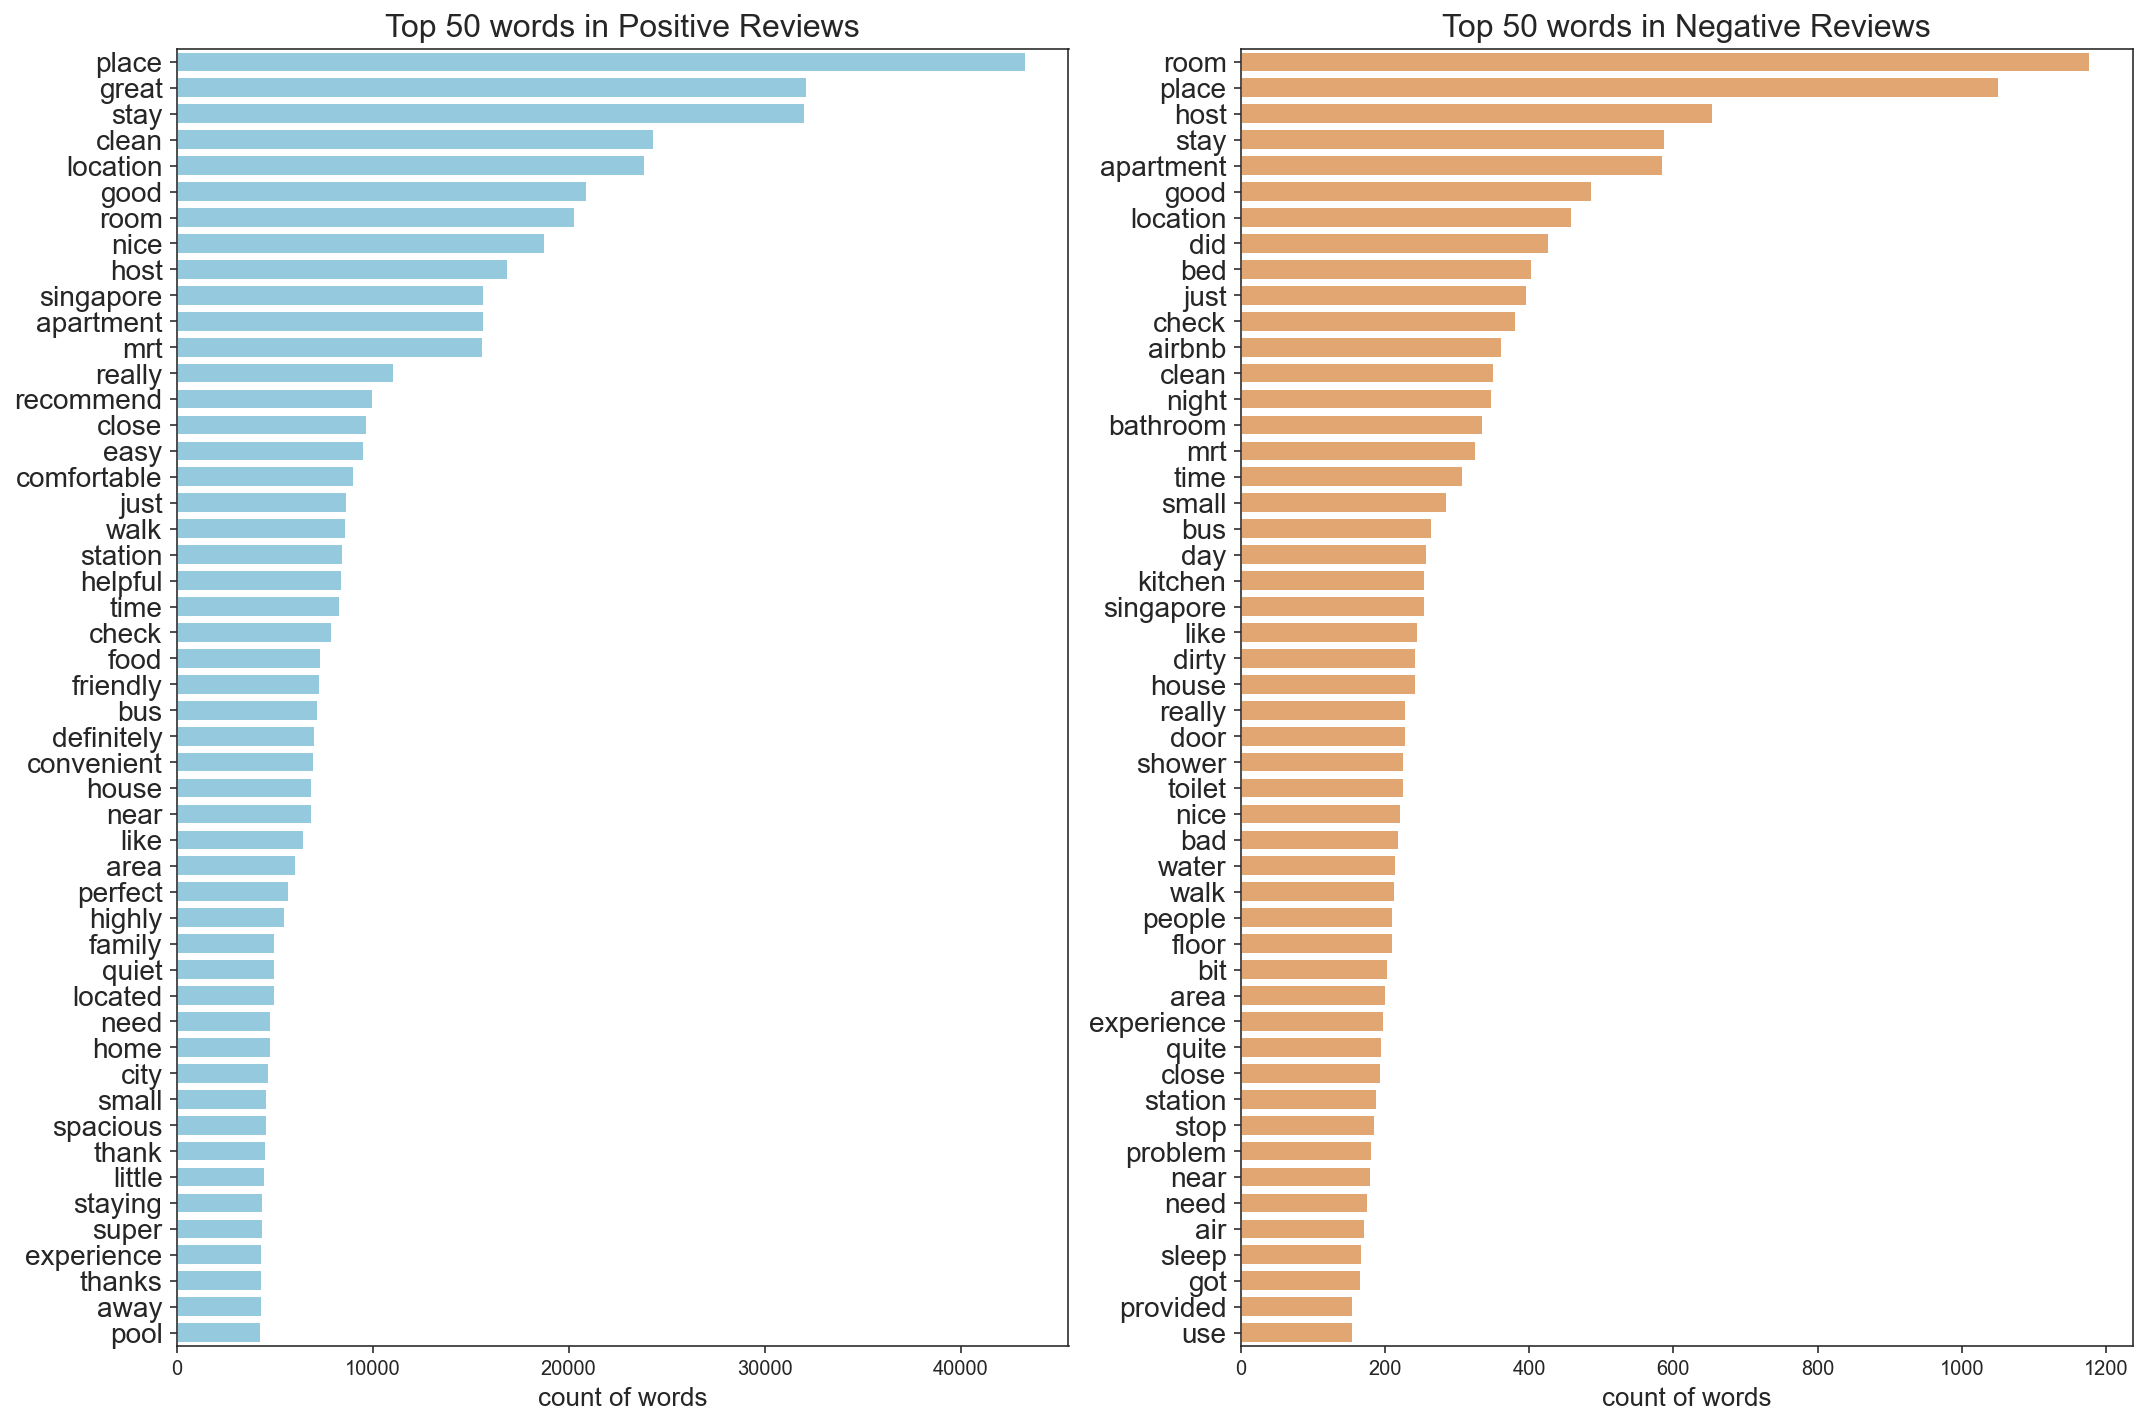

In [103]:
# fit/transform count vectoriser to comments and get the 50 words with the highest count
vec_positive = cvec.fit_transform(reviews[reviews['sentiment']=='positive']['comments'])
vec_positive = pd.DataFrame(vec_positive.toarray(), columns = cvec.get_feature_names())
positive_50 = vec_positive.sum().sort_values(ascending=False).head(50)

vec_negative = cvec.fit_transform(reviews[reviews['sentiment']=='negative']['comments'])
vec_negative = pd.DataFrame(vec_negative.toarray(), columns = cvec.get_feature_names())
negative_50 = vec_negative.sum().sort_values(ascending=False).head(50)

# plot results
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10))

sns.barplot(y=positive_50.index.values, x = positive_50,color='skyblue',ax=ax[0])
ax[0].set_title('Top 50 words in Positive Reviews',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=negative_50.index.values, x = negative_50,color='sandybrown',ax=ax[1])
ax[1].set_title('Top 50 words in Negative Reviews',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

Another method for visually exploring text is using a count vectoriser to transform the text data to extract uni-grams for analysis based on frequencies of a word (illustrated by size) in a corpus (i.e. reviews).

There are some common words with high counts and generic words which do not add to the context information e.g 'singapore', "airbnb", "thanks", "recommend" which appear in the positive and negative reviews. They will need to be added to the stopword list for topic modelling to potentially improve the topic clustering performance.

# Topic Modelling

Next, we will explore topic modelling on the reviews data. Topic Modelling is an unsupervised machine learning technique to extract hidden topics from large volume of texts within a collection of documents. It considers each document to be represented by a blend of topics and each topic to be represented by a set of words that frequently occur together.

I will be using the Latent Dirichlet Allocation (LDA) algorithm from Mallet, which is a Java modelling toolkit with a Gensim wrapper for LDA. Mallet has an efficient implementation and is known to give better topics segregation using Gibbs Sampling method compared to Gensim's standard LDA which uses a faster but less precise Variational Bayes sampling method.

The models will be evaluated based on the topic coherence scores and interpretability. Topic coherence score measures the degree of semantic similarity between top keywords in the topic; it ranges from 0 to 1 (the higher the better).

The goal is to identify the topics that are discussed in the positive and negative Airbnb reviews to provide insights to hosts or home owners who plan to rent out their accommodation through Airbnb platform.

### Import libraries

In [2]:
from nltk.corpus import names
from nltk.corpus import stopwords
import spacy

from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.test.utils import datapath
from gensim.test.utils import common_texts, get_tmpfile

import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

### Pre-processing

A series of pre-processing steps were performed on the text reviews to prepare the data for modelling. They are namely:

- Tokenizing the text and removing unnecessary characters and punctuations
- Removing stopwords and personal names that does not add meaning to the documents 
- Lemmatizing each word to its root form to combine similar forms of the same word, keeping only nouns, adjectives, verbs and adverbs as they are the ones contributing the most to the meaning of the sentences. 
- Adding bi-grams to provide more context to the words


In [4]:
# Remove non-ascii characters
reviews['comments'] = reviews['comments'].map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x))

In [82]:
# Instantiate tokenizer
tokenizer = RegexpTokenizer(r'\w+', gaps=False)

# Get Stopwords
stop_words = stopwords.words('english')
stop_words.extend(['singapore', 'thank', 'thanks', 'airbnb', 'sujatha', 'fran', 'would', 'could', 'need', 'needed','regards','expo','recommended','recommend'])
stop_words = set(stop_words)

# Get Punctuations
punctuations = set(string.punctuation)

# Get personal names
names = set(w.lower() for w in names.words())

In [6]:
# !python3 -m spacy download en  # run in terminal once

# Create pre-processing function
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Tokenize, Remove Stopwords and Lemmatization"""
    texts = [[word for word in tokenizer.tokenize(str(doc)) if (word.lower() not in set(stop_words | punctuations | names) and (len(word) > 1))] for doc in texts]

    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    
    for sentence in texts:
        doc = nlp(" ".join(sentence)) 
        texts_out.append([token.lemma_.lower() for token in doc if token.pos_ in allowed_postags])
    
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in tokenizer.tokenize(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [22]:
# Pre-process comments using pre-processing function
reviews['tokens'] = process_words(reviews['comments'])

In [24]:
# Add bigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(reviews['tokens'], min_count=10)
for i in range(len(reviews['tokens'])):
    for token in bigram[reviews['tokens'][i]]:
        if '_' in token:
            # Token is a bigram, add to document.
            reviews['tokens'][i].append(token)

In [25]:
# write to csv to avoid long runtime 
reviews.to_csv('../data/reviews_v3_tokenized.csv', index=False)

In [3]:
reviews = pd.read_csv('../data/reviews_v3_tokenized.csv', converters={'tokens': eval})

In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,text_length,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,sentiment,tokens
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...,en,22,0.000,0.434,0.566,0.9615,positive,"[absolutely, gracious, welcoming, make, stay, ..."
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...,en,40,0.000,0.644,0.356,0.9484,positive,"[comfortable, room, smart, condo, development,..."
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...,en,71,0.023,0.589,0.388,0.9868,positive,"[stay, house, good, night, boyfriend, husband,..."
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...,en,42,0.000,0.625,0.375,0.9627,positive,"[stay, room, clean, location, perfect, stop, r..."
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am...",en,17,0.000,0.447,0.553,0.9274,positive,"[great, experience, nice, place, amazing, comp..."


## Positive Reviews

### Create Dictionary and Corpus

In [4]:
# Create dictionary
dictionary = corpora.Dictionary(reviews[reviews['sentiment']=='positive']['tokens'])
print('Number of unique words in original documents:', len(dictionary))

# Filter out words that occur in less than 20 documents, or more than 10% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.1)
print('Number of unique words after removing rare and common words:', len(dictionary))

# Create corpus
texts = reviews[reviews['sentiment']=='positive']['tokens']

# Term document frequency
corpus = [dictionary.doc2bow(text) for text in texts]

# View example
print(corpus[:1])

Number of unique words in original documents: 15812
Number of unique words after removing rare and common words: 3186
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [5]:
# Readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('absolutely', 1),
  ('cozy', 1),
  ('definitely', 1),
  ('experience', 1),
  ('gracious', 1),
  ('make', 1),
  ('peaceful', 1),
  ('welcoming', 1)]]

### Build LDA  Model 

In [45]:
## uncomment the code if working locally
#lda_mallet.save(datapath("pos_model"))
#lda_mallet = gensim.models.wrappers.LdaMallet.load(datapath("pos_model"))

In [12]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/mallet/'})

# Build LDA Mallet model 
mallet_path = 'C:/mallet/bin/mallet'
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=7, id2word=dictionary, 
                                              random_seed=123,iterations=2000)

# Show Topics
pprint(lda_mallet.show_topics(formatted=False,num_words=15))

# Compute Coherence Score
coherence_model_lda_mallet = CoherenceModel(model=lda_mallet, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda_mallet = coherence_model_lda_mallet.get_coherence()
print('\nCoherence Score: ', coherence_lda_mallet)

[(0,
  [('check', 0.07776404267816908),
   ('friendly', 0.04236255402716043),
   ('staff', 0.027914398183460018),
   ('quick', 0.02676591006724354),
   ('responsive', 0.02516153353848312),
   ('communication', 0.024933589332211147),
   ('money', 0.020690320261609812),
   ('excellent', 0.020357171037058468),
   ('accommodate', 0.019725940927382238),
   ('super', 0.019585667569676408),
   ('picture', 0.01831444026546733),
   ('respond', 0.017779648089213857),
   ('fast', 0.017034445876401638),
   ('pleasant', 0.016306777833302647),
   ('response', 0.01570184897819626)]),
 (1,
  [('provide', 0.036524137931034484),
   ('bathroom', 0.018798029556650248),
   ('bed', 0.01867192118226601),
   ('day', 0.01820689655172414),
   ('work', 0.01771822660098522),
   ('kitchen', 0.0169064039408867),
   ('water', 0.01607881773399015),
   ('unit', 0.0144),
   ('air', 0.014297536945812808),
   ('bedroom', 0.01423448275862069),
   ('towel', 0.012303448275862069),
   ('private', 0.01171231527093596),
   ('f

### Visualise topics and keywords

In [8]:
# Create function to convert LDA Mallet model to Gensim model to visualisze output on interactive PyLDAvis 
def malletmodel2ldamodel(mallet_model, gamma_threshold=0.001, iterations=50):
    """Convert :class:`~gensim.models.wrappers.ldamallet.LdaMallet` to :class:`~gensim.models.ldamodel.LdaModel`.
    This works by copying the training model weights (alpha, beta...) from a trained mallet model into the gensim model.
    Parameters
    ----------
    mallet_model : :class:`~gensim.models.wrappers.ldamallet.LdaMallet`
        Trained Mallet model
    gamma_threshold : float, optional
        To be used for inference in the new LdaModel.
    iterations : int, optional
        Number of iterations to be used for inference in the new LdaModel.
    Returns
    -------
    :class:`~gensim.models.ldamodel.LdaModel`
        Gensim native LDA.
    """
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
        iterations=iterations,
        gamma_threshold=gamma_threshold,
        dtype=np.float64  # don't lose precision when converting from MALLET
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [13]:
# Visualize the topics

model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis
pyLDAvis.save_html(vis, 'lda_mallet_7topics_positive.html')

### Most representative document for each topic

In [14]:
# Create function to tabulate dominant topic and percentage contribution of each topic for each document

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=reviews['comments']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Percent Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Percent_Contribution', 'Topic_Keywords']

    # Add original review text to the end of the output
    contents = pd.Series(texts).reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [15]:
# Extract dominant topic, weight of the topic and the keywords for each document 
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=reviews[reviews['sentiment']=='positive']['comments'])

# Format columns
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Percent_Contribution', 'Keywords', 'Text']

# Check dataframe created
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Percent_Contribution,Keywords,Text
0,0,4.0,0.1878,"make, home, feel, house, give, day, experience...",Fran was absolutely gracious and welcoming. Ma...
1,1,3.0,0.1604,"family, back, enjoy, pool, amazing, highly, pe...",A comfortable room in a smart condo developmen...
2,2,5.0,0.1991,"bus, convenient, minute, restaurant, stop, nea...",Stayed over at Sujatha's house for 3 good nigh...
3,3,3.0,0.2160,"family, back, enjoy, pool, amazing, highly, pe...",It's been a lovely stay at Sujatha's. The room...
4,4,5.0,0.1751,"bus, convenient, minute, restaurant, stop, nea...","We had a great experience. A nice place, an am..."


In [17]:
# Group top 2 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Percent_Contribution'], ascending=[0]).head(2)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format columns
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Percent_Contribution", "Keywords", "Text"]

# Show top 2 most representative document for each topic
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Percent_Contribution,Keywords,Text
0,0.0,0.3173,"check, friendly, staff, quick, responsive, com...",The apartment is exactly as described and pict...
1,0.0,0.3166,"check, friendly, staff, quick, responsive, com...",I enjoyed my stay here and would recommend to ...
2,1.0,0.4941,"provide, bathroom, bed, day, work, kitchen, wa...",Our family of 6 adults and 1 infant (17-month ...
3,1.0,0.4850,"provide, bathroom, bed, day, work, kitchen, wa...",Please read important info inside.\n\nDarrick'...
4,2.0,0.4642,"night, small, people, bit, bed, bathroom, floo...",Room quite small but good enough for spend few...
5,2.0,0.4588,"night, small, people, bit, bed, bathroom, floo...",Pros: Staff went out of their way to help me o...
6,3.0,0.3281,"family, back, enjoy, pool, amazing, highly, pe...",What an incredible best-kept-secret hidden gem...
7,3.0,0.3255,"family, back, enjoy, pool, amazing, highly, pe...",Fantastic apartment located in Chinatown in a ...
8,4.0,0.4063,"make, home, feel, house, give, day, experience...",I m writing this comments because the owner di...
9,4.0,0.3865,"make, home, feel, house, give, day, experience...",Fran and Bross were the bet hosts I could have...


In [20]:
# Topic 1: Responsive communication/ Accurate listing description
sent_topics_sorteddf_mallet['Text'][0]

'The apartment is exactly as described and pictures are 100% accurate. It was clean, pleasant, quiet, and had everything we needed for a two-week stay. The host was very communicative, understanding, and responded quickly to our messages. Checking in and out was a breeze. Definitely recommended.'

In [23]:
# Topic 2: Comprehensive basic amenity provided by accommodation
sent_topics_sorteddf_mallet['Text'][2]

"Our family of 6 adults and 1 infant (17-month old toddler) stayed for 4 days at Kelamel's condo unit. We were out for most of the day, and we used the place mostly for getting ready and for sleeping.\n\nThe unit had two air conditioning units, one in the master bedroom and another in the living area where the kitchen was also located. The AC units cooled the place quickly.\n\nThere were two sleeping areas: the master bedroom and the living room. The master bedroom had a full queen-sized bed with frame and mattress. In the living room, there were two queen-sized mattresses. Each bed came with two pillows and a bedsheet. There were five comforters/blankets.\n\nThe kitchen amenities included: sink, 2-burner electric stove, electric kettle, toaster oven, rice cooker, and refrigerator with freezer. There were also cooking/eating utensils, pots/pans, and tableware. There was a good-sized table and two dining chairs. There were also some cooking supplies like rice, oil, and salt. The kitchen

In [28]:
# Topic 3: Noise level within accommodation affecting sleep. Inaccuracy in sentiment classification; should be a negative review
sent_topics_sorteddf_mallet['Text'][4]

'Room quite small but good enough for spend few nights just only the next door is very noisy 1st day I stay the next door is keep make noise all the times talk and keep shout very loud even they sit in toilet we also know what they have problem inside they toilet. We had book for 2 room after we just came back from outside and walk inside our room not lock the door yet the old auntie from next door suddenly open our room as a wrong remrmber own room and she just leave without say sorry and even close the door really very rude. 2nd night I heard another next door keep open and close their room whole night they close the door very loud one and the 3rd day in the morning before check out got see many guy keep walk outside room they look like just finish shower keep walk in front of our room with 1 towel on body no wear any shirt and pant and some even change their clothes in front of room why they do not do all of this inside their room. Bed is good to sleep pillow too soft for me and bla

In [31]:
# Topic 4: Holistic overall experience
sent_topics_sorteddf_mallet['Text'][6]

"What an incredible best-kept-secret hidden gem in Singapore. Photos do not do justice to this gorgeous stylish apartment, sparkling clean, with amazing amenities. No words are good enough to describe Darren's outstanding hospitality. The location is the best you can ever get in Singapore (I lived for 3 years right behind this building and I know what I am talking about!) , and the views from the balcony are breathtaking. Last but not least, if you enjoy durian, you can get the best   at a stall right around the corner. Heaven! It was a beyond-exceptional experience. Thank you!"

In [35]:
# Topic 5: Personalised interaction; warm and friendly hosts
sent_topics_sorteddf_mallet['Text'][9]

'Fran and Bross were the bet hosts I could have asked for. Before meeting, Fran was extremely prompt and efficient with her contact and emails which made booking extremely easy. She took care to know exactly when I was arriving and also that I knew how to get around, my hosts made me feel most welcome and I really felt pampered when I got to their place. They never disturbed me at any point and always made sure I was taken care of and looked after, I instantly felt like their son and really I have gained some very good friends from my stay at their place. Also, Fran and Bross make for great conversation! I cannot remember the amount of times I spent in deep thought and also in laughter. The place itself was extremely spacious and had everything I needed and pretty much had a bathroom all to myself for the entirety of my stay, Fran also took care of my laundry for me and both Fran and Bross took me around on some evenings which really I did not expect but I just had a great stay with th

In [38]:
# Topic 6: Accessibility to points of interest
sent_topics_sorteddf_mallet['Text'][11]

"Darrick's place is clean, within walking distance to 24-hour supermarket, food hawker center, bars along Clarke Quay, shopping centers, bus stop in front of the apartment and Somerset MRT station."

In [43]:
# Topic 7: Uniqueness of neighbourhood
sent_topics_sorteddf_mallet['Text'][12]

'Lovely spacious place situated a stones throw away from the MRT. Lots of local food options and a vibrant local food scene on the doorstep of little india. A wonderful, affordable location ideal for long stay travellers or those looking for a more authentic residential area.'

### Topic Interpretation

The 7 topic clusters are chosen based on iteratively varying the input on number of topics to be fed into the LDA Mallet model, and evaluating based on the coherence scores (0.62 in this case) and the interpretability of topic clusters from keywords generated.   

The positive reviews could be broken down into the following 7 topics below:

- Topic 1: Responsive communication and accurate listing description
- Topic 2: Provision of basic amenities e.g. toiletries, washing machine, breakfast
- Topic 3: Noise level within accommodation affecting sleep
- Topic 4: Holistic overall experience
- Topic 5: Personalised interaction; warm and friendly hosts
- Topic 6: Accessibility to points of interest e.g. MRT stations, bus-stops, supermarkets
- Topic 7: Uniqueness of neighbourhood

## Negative Reviews

### Create Dictionary and Corpus

In [19]:
# Create dictionary
neg_dictionary = corpora.Dictionary(reviews[reviews['sentiment']=='negative']['tokens'])

print('Number of unique words in original documents:', len(neg_dictionary))

# Filter out words that occur in less than 5 documents, or more than 10% of the documents
neg_dictionary.filter_extremes(no_below=5, no_above=0.1)
print('Number of unique words after removing rare and common words:', len(neg_dictionary))

# Create corpus
neg_texts = reviews[reviews['sentiment']=='negative']['tokens']

# Term document frequency
neg_corpus = [neg_dictionary.doc2bow(text) for text in neg_texts]

# View example
print(neg_corpus[:1])

Number of unique words in original documents: 5145
Number of unique words after removing rare and common words: 1534
[[(0, 2), (1, 1), (2, 1)]]


### Build LDA Model

In [257]:
# uncomment the code if working locally
#lda_mallet_neg.save(datapath("neg_model"))
#lda_mallet_neg = gensim.models.wrappers.LdaMallet.load(datapath("neg_model"))

In [119]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/mallet/'})

# Build LDA Mallet model
mallet_path = 'C:/mallet/bin/mallet'
lda_mallet_neg = gensim.models.wrappers.LdaMallet(mallet_path, corpus=neg_corpus, num_topics=6, id2word=neg_dictionary, random_seed=123)

# Show Topics
pprint(lda_mallet_neg.show_topics(formatted=False,num_words=15))

# Compute Coherence Score
coherence_model_lda_mallet = CoherenceModel(model=lda_mallet_neg, texts=neg_texts, dictionary=neg_dictionary, coherence='c_v')
coherence_lda_mallet = coherence_model_lda_mallet.get_coherence()
print('\nCoherence Score: ', coherence_lda_mallet)

[(0,
  [('toilet', 0.03556450260023486),
   ('shower', 0.034725717161550075),
   ('provide', 0.03439020298607616),
   ('water', 0.03271263210870659),
   ('towel', 0.031035061231337025),
   ('dirty', 0.03069954705586311),
   ('space', 0.017950008387854387),
   ('expect', 0.014762623720852207),
   ('sheet', 0.014427109545378292),
   ('live', 0.013756081194430465),
   ('amenity', 0.012749538668008724),
   ('machine', 0.012581781580271767),
   ('response', 0.012414024492534809),
   ('hair', 0.01191075322932394),
   ('picture', 0.011742996141586982)]),
 (1,
  [('sleep', 0.03896551724137931),
   ('work', 0.03706896551724138),
   ('kitchen', 0.029482758620689654),
   ('area', 0.028275862068965516),
   ('problem', 0.02724137931034483),
   ('bedroom', 0.02689655172413793),
   ('window', 0.025),
   ('find', 0.023448275862068966),
   ('noise', 0.019655172413793102),
   ('hot', 0.019137931034482757),
   ('light', 0.017586206896551725),
   ('long', 0.016551724137931035),
   ('tv', 0.014827586206896

### Visualise topics and keywords

In [252]:
# Visualize the topics
neg_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet_neg)

pyLDAvis.enable_notebook()
neg_vis = pyLDAvis.gensim.prepare(neg_model, neg_corpus, neg_dictionary)
neg_vis
pyLDAvis.save_html(neg_vis, 'lda_mallet_6topics_negative.html')

### Most representative document for each topic

In [193]:
df_neg_topic_sents_keywords = format_topics_sentences(ldamodel=neg_model, corpus=neg_corpus, texts=reviews[reviews['sentiment']=='negative']['comments'])

# Format columns
df_dominant_topic = df_neg_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Percent_Contribution', 'Keywords', 'Text']

# Check dataframe created
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Percent_Contribution,Keywords,Text
0,0,4.0,0.2096,"bus, close, nice, station, bit, bus_stop, conv...",The location is very close to EXPO and Bus sto...
1,1,4.0,0.2633,"bus, close, nice, station, bit, bus_stop, conv...",It was fine. Perfect for someone wanting to be...
2,2,4.0,0.1961,"bus, close, nice, station, bit, bus_stop, conv...",It was unfortunate that Belinda was not arroun...
3,3,4.0,0.1858,"bus, close, nice, station, bit, bus_stop, conv...",The room is quite small but comfy. It has airc...
4,4,0.0,0.1848,"toilet, shower, provide, water, towel, dirty, ...","It's terrible.The house near the airport ,but ..."


In [209]:
# Group top 2 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_neg_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Percent_Contribution'], ascending=[0]).head(2)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format columns
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Percent_Contribution", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Percent_Contribution,Keywords,Text
0,0.0,0.5225,"toilet, shower, provide, water, towel, dirty, ...",We stayed at this location between 5-12 Nov 20...
1,0.0,0.4345,"toilet, shower, provide, water, towel, dirty, ...",Bed had a bar on the side that was higher than...
2,1.0,0.3657,"sleep, work, kitchen, area, problem, bedroom, ...",The photos are accurate and the Oslo room is c...
3,1.0,0.3415,"sleep, work, kitchen, area, problem, bedroom, ...",The accomodation is in a fantastic location fo...
4,2.0,0.5580,"book, pay, unit, give, hotel, hour, family, li...","On the day of arrival, the coordinator sent me..."
5,2.0,0.4401,"book, pay, unit, give, hotel, hour, family, li...",We have booked this place for 4D3N from Malays...
6,3.0,0.4021,"door, experience, house, thing, leave, people,...",We feel unsafe to stay in this property due to...
7,3.0,0.3954,"door, experience, house, thing, leave, people,...","First of all, I would like to thank Lena for h..."
8,4.0,0.3940,"bus, close, nice, station, bit, bus_stop, conv...",The location is very convenient close to China...
9,4.0,0.3701,"bus, close, nice, station, bit, bus_stop, conv...",The value for this place is quite reasonable. ...


In [196]:
# Topic 1: Lack of basic amenities provided by accommodation
sent_topics_sorteddf_mallet['Text'][0]

'We stayed at this location between 5-12 Nov 2019\n\nCommunication lacked, reserved flat and asked question about checking in/contact info, response was never provided, two months before hearing back with instructions. Took hours to get a response, and typically never addressed questions.\n\nThey were very responsive concerning billing us.\n\nThe check in procedures sent worked well and had no problem actually getting into the room etc  \n\nAccuracy of description of flat;\n\nBathroom\nPhotos were not of the flat we reserved and paid for\nThey were of a different newly renovated bath, ours was old and dirty\nScum/dirt at faucet, peeling caulking, mildew, mold, hair ball in drain, cock roach, dirty shower curtain and water drained onto floor, bath tile painted, runs in paint, looked horrible would not have reserved this flat if pictures of bath were correct\nNo plug for hair dryer in bathroom, had to dry hair in kitchen with no mirror.\n\nLinens/Towels\nRented flat specifically for seco

In [210]:
# Topic 2: Noisy surroundings affecting sleep
sent_topics_sorteddf_mallet['Text'][2]

"The photos are accurate and the Oslo room is cosy and comfortable.\n\nHowever, there is little separation from the rest of the house, which has not been built with acoustics in mind   conversations on the ground floor could be heard from inside the bedroom, two flights of stairs above, which I found very distracting and disruptive.\n\nThe morning after my check-in (a Sunday), a commotion on the ground floor woke me up. A filming crew of about 50 took over the house from before 8 am until after 10 pm, working on a tv show. They returned for another day of filming on the day I checked out (a Saturday). I had received no warning about this and was very unhappy about not being able to spend a peaceful weekend in the space I had paid for. I also had no access to the laundry room or the kitchen, which forced me out of the house in search of alternative solutions. The host was apologetic when I contacted them, and explained that this was a weekly arrangement they were trying out.\n\nMore on 

In [211]:
# Topic 3: Poor host communication and inaccuracy in listing details
sent_topics_sorteddf_mallet['Text'][4]

'On the day of arrival, the coordinator sent me the address and the unit number, but the address provided by the coordinator is not as same as the listing. The procedure of getting the key and getting into the unit was easy, but when we got in, the entire place was occupied. My first thought was I booked the wrong place but after checking the booking details, I was right that I booked the entire condo for my family trip. So I texted the coordinator and he replied that the admin person gave a wrong unit number to me, so I went to the unit that was supposed to be right. \nWhen I arrived the  correct  unit, the place was not ready at all. The staffs were still cleaning and the place that we were assigned was not as same as the description as the listing.\nOn the listing, it said there s a good queen mattress but there were only single beds in the condo that we were provided. The condo was much further  than the one on the listing. So I texted the coordinator again and what he replied was 

In [212]:
# Topic 4: Poor overall experience
sent_topics_sorteddf_mallet['Text'][6]

'We feel unsafe to stay in this property due to the owner check the room frequently. Once we leave, the owner will go in and check to make sure we switch off the aircon. This is how we get to know that owner is checking the room frequently, i received message from owner regarding of we did not switch off the air-con once we leave the room. We are just at downstair waiting for grab. There are many times when we going out and the owner is coming in to check for others rooms. \nAlthough stated there that the owner are allowed to enter the room to switch off air-con if we do not switch it off, i think is rather invading the privacy of our property in the room.\nWhat if our valuable goes missing, who will take responsible? \nThe house is quite pack, there are 5 rooms but with only 2 bathrooms and this is very inconvenient to us. Each rooms can actually occupied more than 5 peoples. Can you imagine if at one time everyone in the house wanted to use the bathroom, how inconvenient can it cause

In [213]:
# Topic 5: Accessibility inconvenience to points of interest
sent_topics_sorteddf_mallet['Text'][9]

'The value for this place is quite reasonable. But it is not walking distance to the nearest MRT (Kembangan, EW line). We have to walk about 400 meters to a bus stop along Frankel Ave. road and take the bus no. 32 to this place. About 1.5km (3 bus stops away). The frequency of this bus is about 10 to 15 mins. \nThere are provision shop, laundry shop and restaurants nearby this place.'

In [214]:
# Topic 6: Dirty accommodation
sent_topics_sorteddf_mallet['Text'][11]

"The entire apartment floor is filled with ants walking around. There's probably over 100 bugs in total but it is not easy to see because the wooden floor is so dark and the bugs are small. I never brought any food or anything smelly that would attract bugs. \n\nA few bugs actually got inside the luggage because I put it on the floor, and they made their way to Canada with me.\n\nAfter telling the host about the bug problem, she replied once asking for proof and then ignored me completely. Unacceptable.\n\nI have unknowingly stepped on and killed a few bugs until I put the towel on the floor which made it easy to spot them. Here is the link to a video for proof. \n (Website hidden by Airbnb)"

### Topic Interpretation

The topic clusters for the negative reviews are difficult to interpret based on the keywords after several rounds of tuning on the topic numbers and dictionary, evidenced by the low coherence score of 0.40 from 6 topics. This could be due to a limited corpus as a result of the smaller number of negative reviews. However, a further examination of the most representative documents that make up the topics helped to infer the topics. This could be broken down below:

- Topic 1: Lack of basic amenities provided by accommodation
- Topic 2: Noisy surroundings affecting sleep
- Topic 3: Poor host communication and inaccuracy in listing details
- Topic 4: Poor overall experience
- Topic 5: Accessibility inconvenience to points of interest
- Topic 6: Dirty accommodation

## Summary

In summary, a majority (about 97%) of the guests had positive reviews on the Airbnb experience based on the sentiment analysis scores. 

The topics extracted from the LDA algorithm provided an insight into the topics of discussion in the reviews of Airbnb guests and is useful to represent the aspects of customer experience that drive customer satisfaction. It is observed that topics can be broadly classified into the categories of (i) overall experience of stay, (ii) the amenities provided by the accommodation, (iii) noise level within the property/ neighbourhood, (iv) location of the unit and proximity to points of interest and (v) communication and friendliness of the hosts.

Hence, Airbnb hosts and potential home owners who plan to use the Airbnb platform to rent out their homes could utilise the insight from this analysis to better target their listings to potential customers and boost the host's reputation on the platform. Competing players in the home sharing accommodation space can also use the information to strategise how to best serve their customers by providing better service quality that leverages the topics of interest derived from this analysis e.g. personable interaction, homely feeling etc, which are important to guest satisfaction.    

## References

#### Lemmatization Approaches
- https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

#### Sentiment Analysis
- https://towardsdatascience.com/sentiment-analysis-vader-or-textblob-ff25514ac540

#### Topic Modelling
- https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
- https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
- https://markroxor.github.io/gensim/static/notebooks/lda_training_tips.html

#### LDA Mallet 
- http://mallet.cs.umass.edu/
- https://medium.com/analytics-vidhya/mallet-machine-learning-for-language-toolkit-installation-on-windows-operating-system-ebea44feb483
- https://stackoverflow.com/questions/50340657/pyldavis-with-mallet-lda-implementation-ldamallet-object-has-no-attribute-inf
- https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/wrappers/ldamallet.py#L359